# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

### In Python, module can be imported by a command similar to 'import numpy as np'. It is a good practice to maintain a section at the beginning of the notebook to import all necessary modules.

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model

### Since in Python, there is no default MASS module and Boston dataset, I will read in the Boston dataset from CSV.

In [85]:
Boston = pd.read_csv('data/Boston.csv', header=0)

## 3.6.2 Simple Linear Regression

In [86]:
list(Boston)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [87]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [88]:
Boston.shape

(506, 14)

### To have similar formula notation as R, use the following import. One thing to note is that the ' ' for the formula part in fitting step and the '.fit()' at the end.

In [89]:
import statsmodels.formula.api as smf

In [90]:
lm = smf.ols ('medv~lstat', data = Boston).fit()

In [91]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           5.08e-88
Time:                        12:06:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### Use dir() to get a list of all the attributes an object has

In [92]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'predict',
 '

In [93]:
print lm.params

Intercept    34.553841
lstat        -0.950049
dtype: float64


In [94]:
print lm.conf_int()

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [95]:
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

array([ 29.80359411,  25.05334734,  20.30310057])

In [96]:
X_new = pd.DataFrame({'lstat': [Boston.lstat.min(), Boston.lstat.max()]})
preds = lm.predict(X_new)

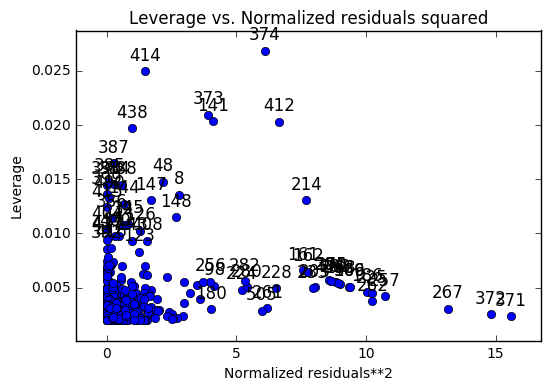

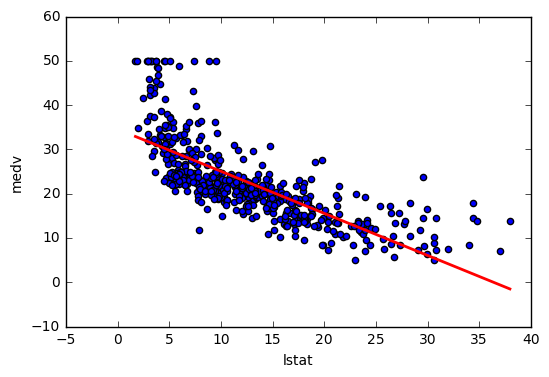

In [97]:
Boston.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

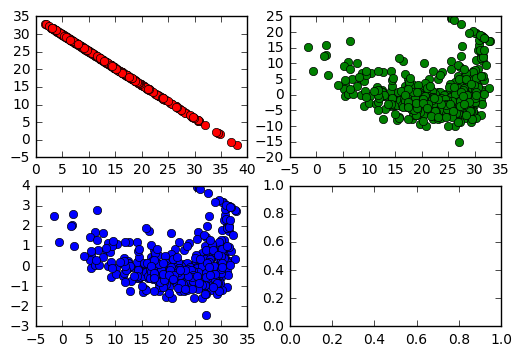

In [98]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(Boston.lstat, lm.predict(),'ro')
ax2.plot(lm.predict(), lm.resid, 'go')
ax3.plot(lm.predict(), lm.resid_pearson, 'bo')
plt.show()

### the statistics of the linear regression mostly stored in lm.get_influence(), for example, the cookdistances, leverage.

In [99]:
dir(lm.get_influence())

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'resid_press',
 'resid_std',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'sigma2_not_obsi',
 'sigma_est',
 'summary_frame',
 'summary_table']

In [100]:
np.argmax(lm.get_influence().hat_matrix_diag)

374

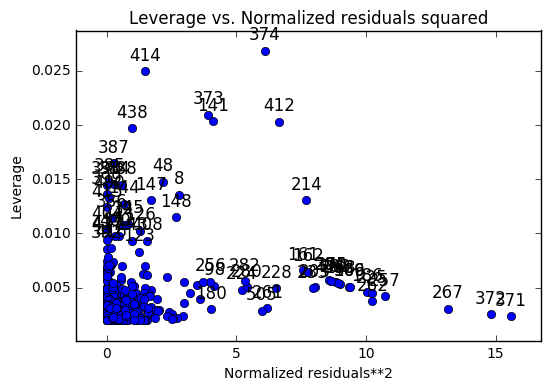

In [101]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm)

### For machine learning models, sklearn is the most common used module.

In [102]:
x = pd.DataFrame(Boston.lstat)
y = Boston.medv
print x.shape

model = linear_model.LinearRegression()
model.fit(x, y)
print model.intercept_
print model.coef_

(506, 1)
34.5538408794
[-0.95004935]


# 3.6.3 Multiple Linear Regression

### To do multiple linear regression, we can use those two modules again. 

In [103]:
lm = smf.ols ('medv~lstat+age', data = Boston).fit()

In [104]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           2.98e-88
Time:                        12:06:52   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

### If we want to use all the variable. We can use the following trick to manually construct the list. In Python, most of time, you have to manully construct the variable list.

In [105]:
all_columns = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
lm = smf.ols(my_formula, data=Boston).fit()

In [106]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 06 Jan 2017   Prob (F-statistic):          6.72e-135
Time:                        12:06:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
age            0.0007      0.013      0.052      0.958        -0.025     0.027
black          0.0093      0.003      3.467      0.001         0.004     0.015
chas           2.6867      0.862      3.118      0.002         0.994     4.380
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
rad            0.3060      0.066      4.613      0.000         0.176     0.436
rm             3.8099      0.418      9.116      0.000         2.989     4.631
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
zn             0.0464      0.014      3.382      0.001         0.019     0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Unlike R, Python is not fully up speeded to all the statistics. If you want to have the VIF of the variables in LM, you have to code a little bit.

In [107]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
y, X = dmatrices(my_formula, data=Boston, return_type='dataframe')
vif_coeff = {}
i = 1
for i in index:
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
print vif_coeff

{'crim': 1.7921915474332411, 'rad': 7.4844963352744722, 'lstat': 2.9414910780919366, 'age': 3.1008255128153364, 'tax': 9.0085539475970702, 'zn': 2.2987581787494409, 'chas': 1.0739953275537883, 'black': 1.3485210764063753, 'rm': 1.9337444357832569, 'nox': 4.3937198475774952, 'indus': 3.9915964183460315, 'ptratio': 1.7990840492488989, 'dis': 3.9559449063727263}
